In [63]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Import Emma image
emma = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

(256,)


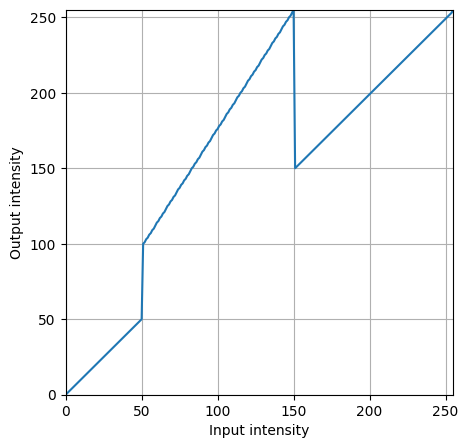

In [123]:
# Define piecewise transformation function
t1 = np.linspace(0, 50, num=51).astype('uint8')
t2 = np.linspace(100, 255, num=100).astype('uint8')
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


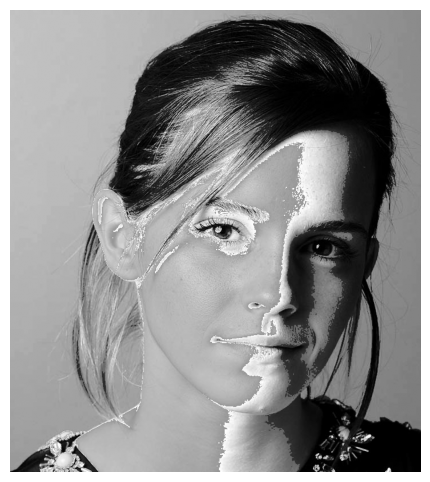

In [124]:
g = t[emma]

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

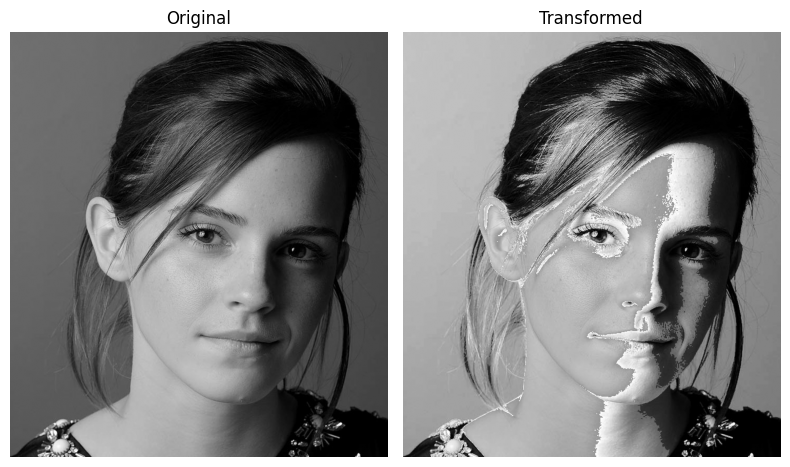

In [67]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(emma, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed')
ax[1].axis("off")

plt.tight_layout()
plt.show()

## Question 2

In [68]:
# Import brain image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

### White matter

(256,)


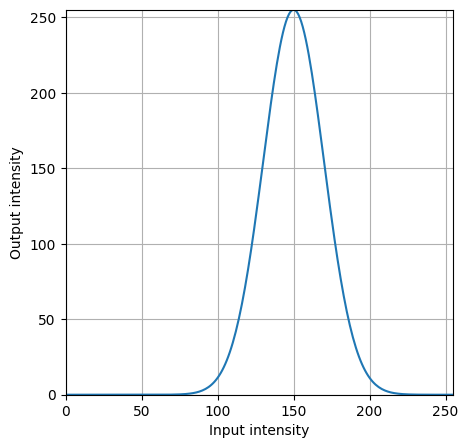

In [69]:
# Define the gaussian pulse
mu = 150
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

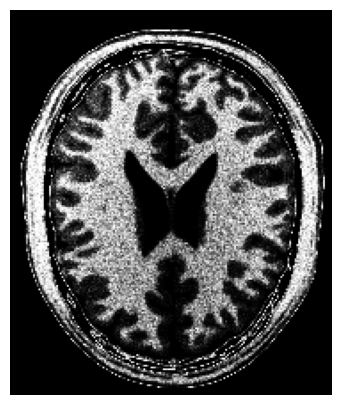

In [70]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

### Wrong approach

(256,)


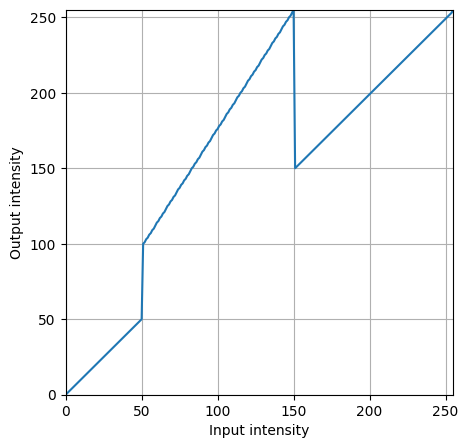

In [71]:
# Define piecewise transformation function
t1 = np.linspace(0, 50, num=51).astype('uint8')
t2 = np.linspace(100, 255, num=100).astype('uint8')
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


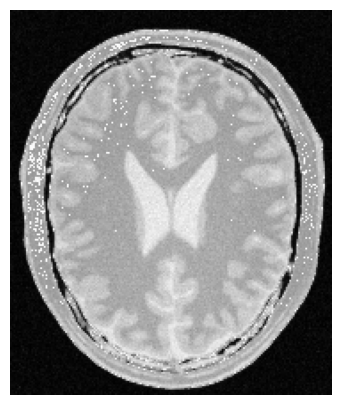

In [72]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

(256,)


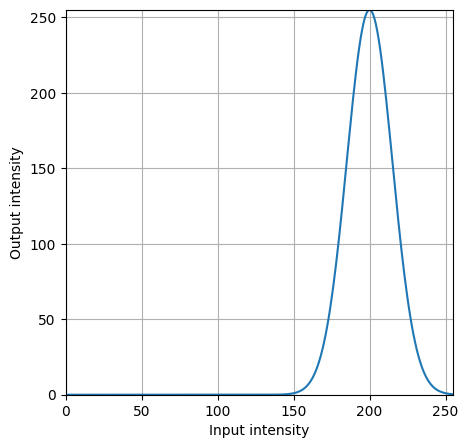

In [73]:
mu = 200
sigma = 15
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

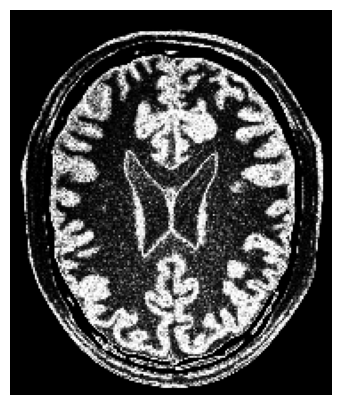

In [74]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [75]:
# Import Emma image
imq3_bgr = cv.imread('a1images/highlights_and_shadows.jpg')
assert imq3_bgr is not None
imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)

In [125]:
# Split the image in to L*a*b* color space
L,a,b = cv.split(imq3_lab)

# Define and apply gamma transformation
gamma = 0.75
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)


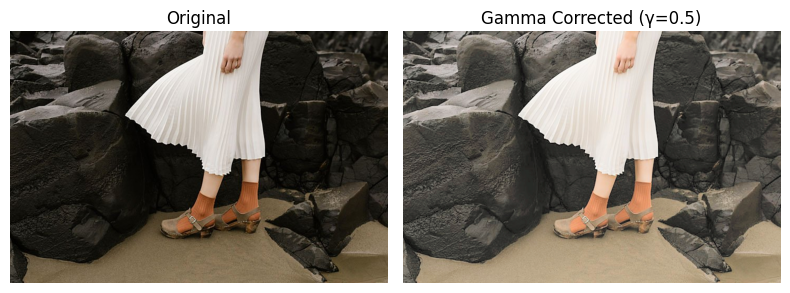

In [126]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first image
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(imq3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

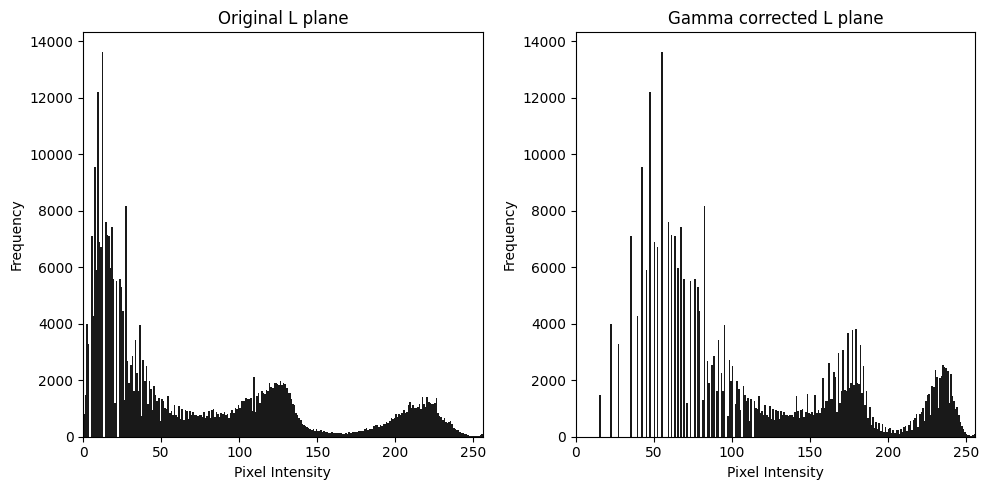

In [127]:
bv

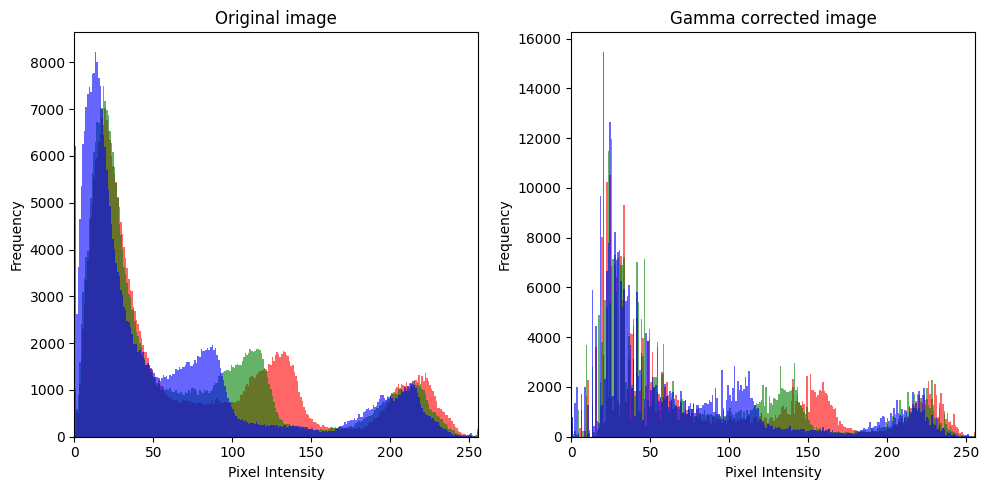

In [79]:
# Color channels
colors = ('r', 'g', 'b')  # Color channels
plt.figure(figsize=(10, 5))

# First image's histograms
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = imq3_rgb[:, :, i].flatten()  # Extract and flatten the red, green, or blue channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second image's histograms
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = imq3_modified[:, :, i].flatten()  # Extract and flatten the channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Gamma corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

## Question 4

In [80]:
# Import Emma image
spider = cv.imread('a1images/spider.png')
assert spider is not None
spider_hsv = cv.cvtColor(spider, cv.COLOR_BGR2HSV)
spider_rgb = cv.cvtColor(spider, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(spider_hsv)

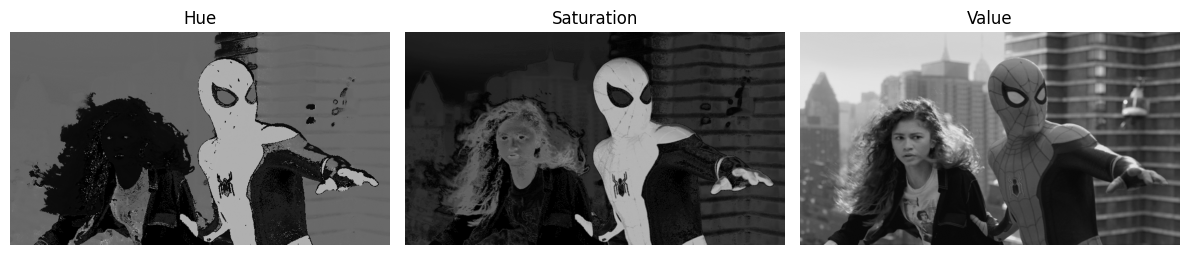

In [81]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

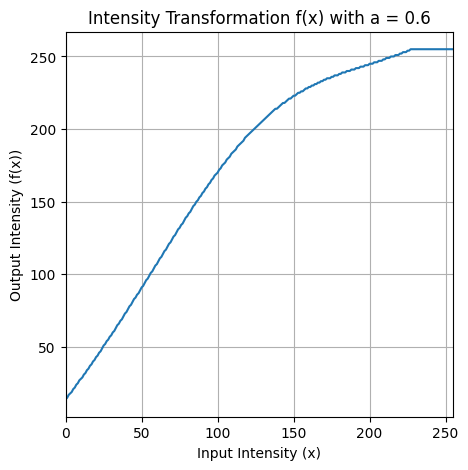

In [82]:
# Define the transformation function
a = 0.6
sigma = 70.0 
x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

# Display the image
plt.figure(figsize=(5, 5))
plt.plot(x, f)
plt.title(f'Intensity Transformation f(x) with a = {a}')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()

In [83]:
# Apply transformation to Saturation plane
S_modified = cv.LUT(S, f)

# Merge
merged = cv.merge([H, S_modified, V])
spider_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

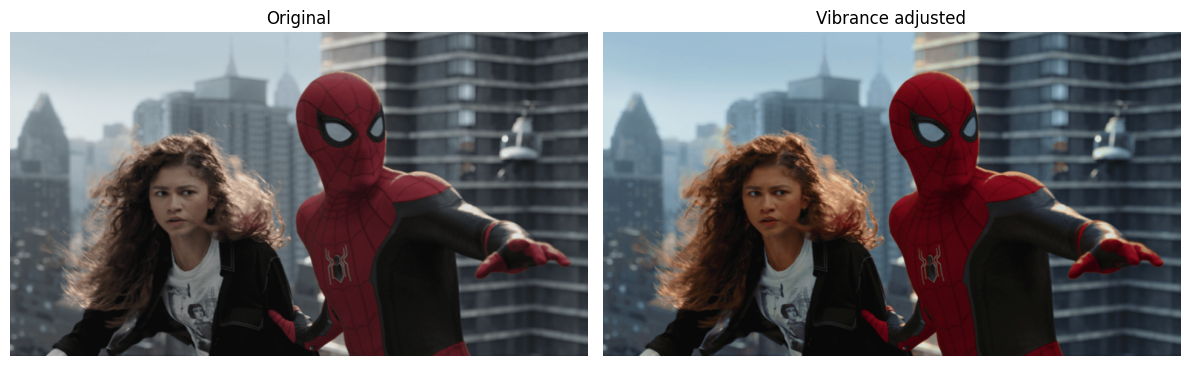

In [84]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(spider_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(spider_modified)
axs[1].set_title('Vibrance adjusted')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

## Question 5

In [85]:
# Import Shells image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None

In [86]:
def histogram_equalization(f):
    # Get image details
    L = 256
    M, N = f.shape

    # Get histogram
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    cdf = hist.cumsum()

    # Define transformation
    t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)]).astype("uint8")

    return t[f]


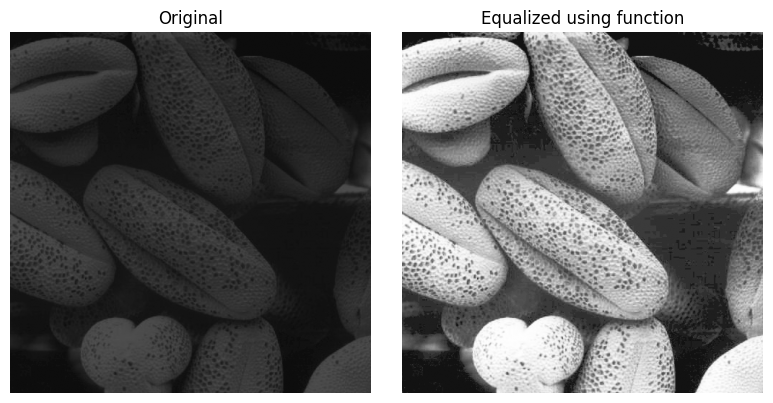

In [87]:
# Do histrogram equalization
equalized = histogram_equalization(shells)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(shells, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized using function')
ax[1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()

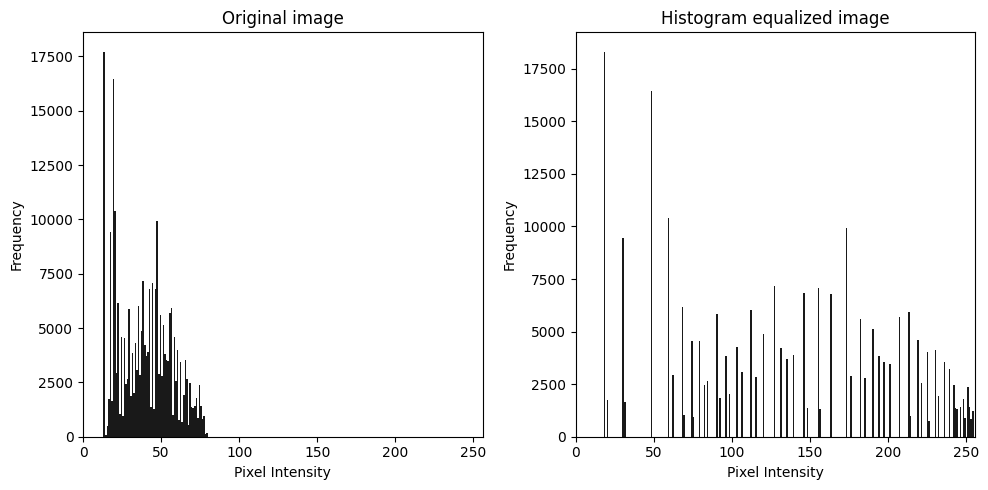

In [88]:
# Compute the histograms for both images
hist1 = cv.calcHist([shells], [0], None, [256], [0, 256])
hist2 = cv.calcHist([equalized], [0], None, [256], [0, 256])

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

shells_flat = shells.flatten()
equalized_flat = equalized.flatten()

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.hist(shells_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.hist(equalized_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Histogram equalized image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

## Question 6

In [89]:
# Import Jennifer image
jennifer = cv.imread('a1images/jeniffer.jpg')
assert jennifer is not None
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
jennifer_rgb = cv.cvtColor(jennifer, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(jennifer_hsv)

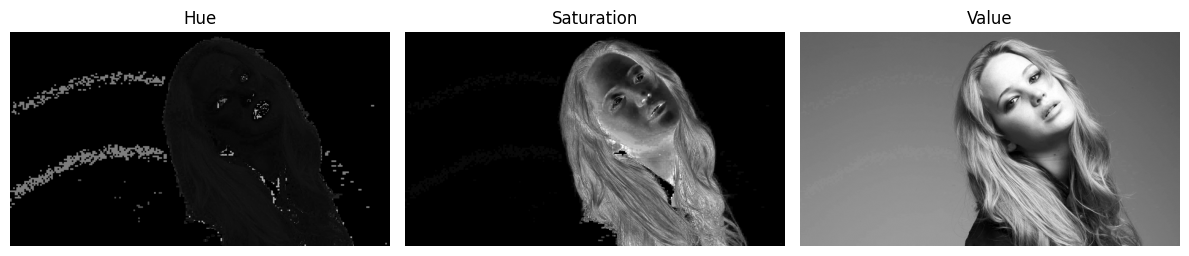

In [90]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

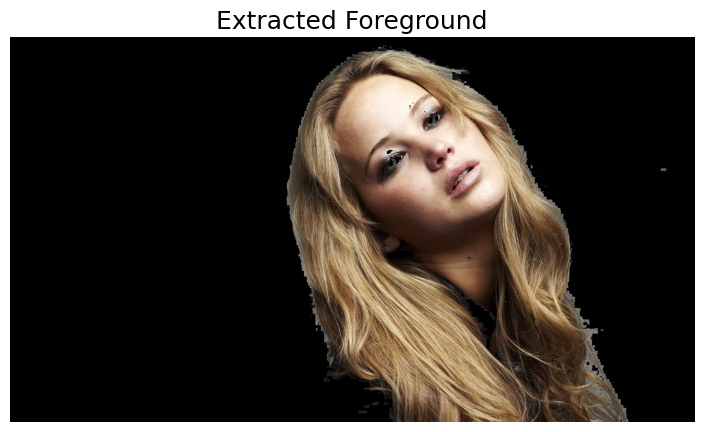

In [91]:
# Apply thresholding on Saturation plane
_, mask = cv.threshold(S, 12, 255, cv.THRESH_BINARY)

# Use bitwise_and to extract the foreground using the mask
foreground = cv.bitwise_and(jennifer, jennifer, mask=mask)

# Display the extracted foreground
plt.figure(figsize=(10, 5))

plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground', fontsize=18)
plt.axis('off')
plt.show()

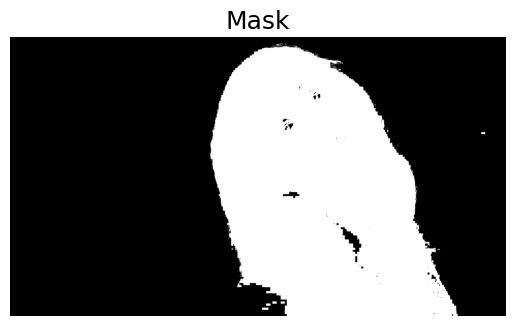

In [92]:
plt.imshow(mask, cmap='gray')
plt.title('Mask', fontsize=18)
plt.axis('off')
plt.show()

### Using value channel

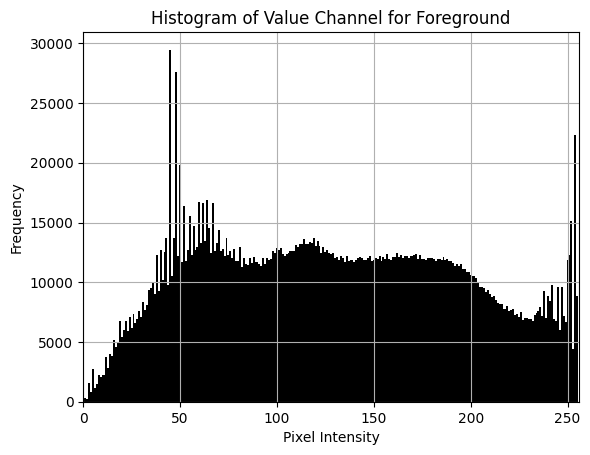

In [93]:
# Compute and plot the histogram of the Value (V) channel of the foreground
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
H_fg, S_fg, V_fg = cv.split(foreground_hsv)

# Calculate the histogram of the Value channel
hist = cv.calcHist([V_fg], [0], mask, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='black', width=1)  # Use width=1 for each bar
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits
plt.grid(True)
plt.show()

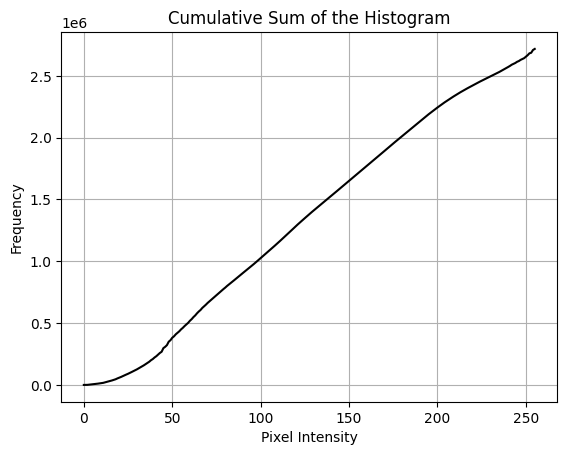

In [94]:
cdf = hist.cumsum()

# Plot the histogram
plt.figure()
plt.plot(cdf, color='black')
plt.title('Cumulative Sum of the Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

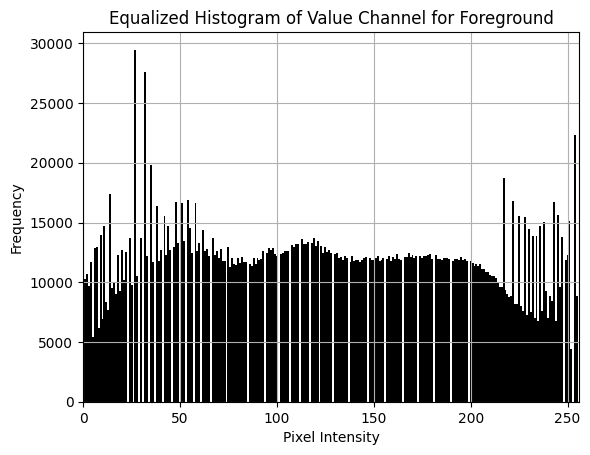

In [95]:
# Number of pixels
pixels = cdf[-1]

# Define transformation
t = np.array([(256-1)/(pixels)*cdf[k] for k in range(256)]).astype("uint8")

# Equalize
V_eq = t[V_fg]

# Calculate the histogram of the equalized Value channel
hist = cv.calcHist([V_eq], [0], mask, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='black', width=1)  # Use width=1 for each bar
plt.title('Equalized Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits
plt.grid(True)
plt.show()

In [96]:
# Merge
merged = cv.merge([H_fg, S_fg, V_eq])
foreground_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

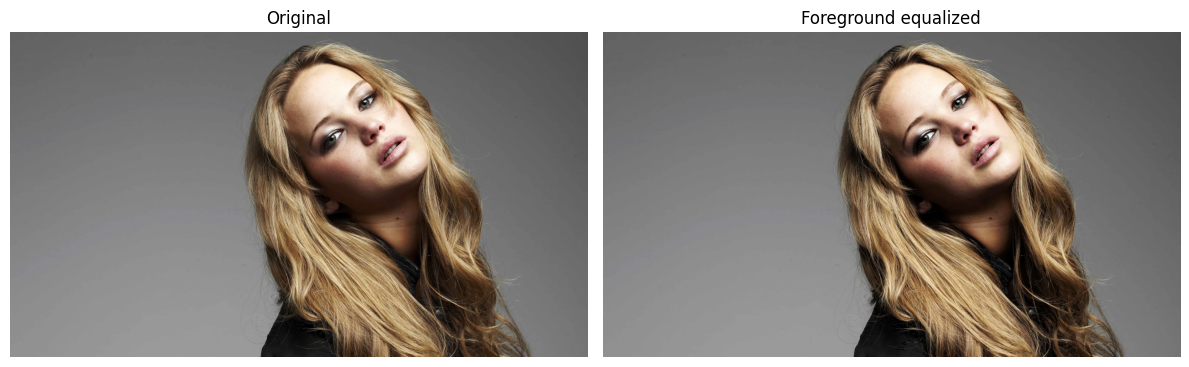

In [97]:
# Extract the background
background = cv.bitwise_and(jennifer, jennifer, mask=cv.bitwise_not(mask))

# Merge the equalized foreground and background
result = cv.add(cv.cvtColor(background, cv.COLOR_BGR2RGB), foreground_modified)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(jennifer_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(result)
axs[1].set_title('Foreground equalized')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()


## Question 7

In [98]:
# Import Einstein image
einstein = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)
assert einstein is not None

In [99]:
# Define the Sobel-X filter
sobel_x = np.array([[1, 0, -1], 
                    [2, 0, -2], 
                    [1, 0, -1]])

# Define the Sobel-Y filter
sobel_y = np.array([[1, 2, 1], 
                    [0, 0, 0], 
                    [-1, -2, -1]])

print("Sobel X filter:")
print(sobel_x)

print("\nSobel Y filter:")
print(sobel_y)

Sobel X filter:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Sobel Y filter:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [100]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = cv.filter2D(einstein, cv.CV_64F, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = cv.filter2D(einstein, cv.CV_64F, sobel_y)

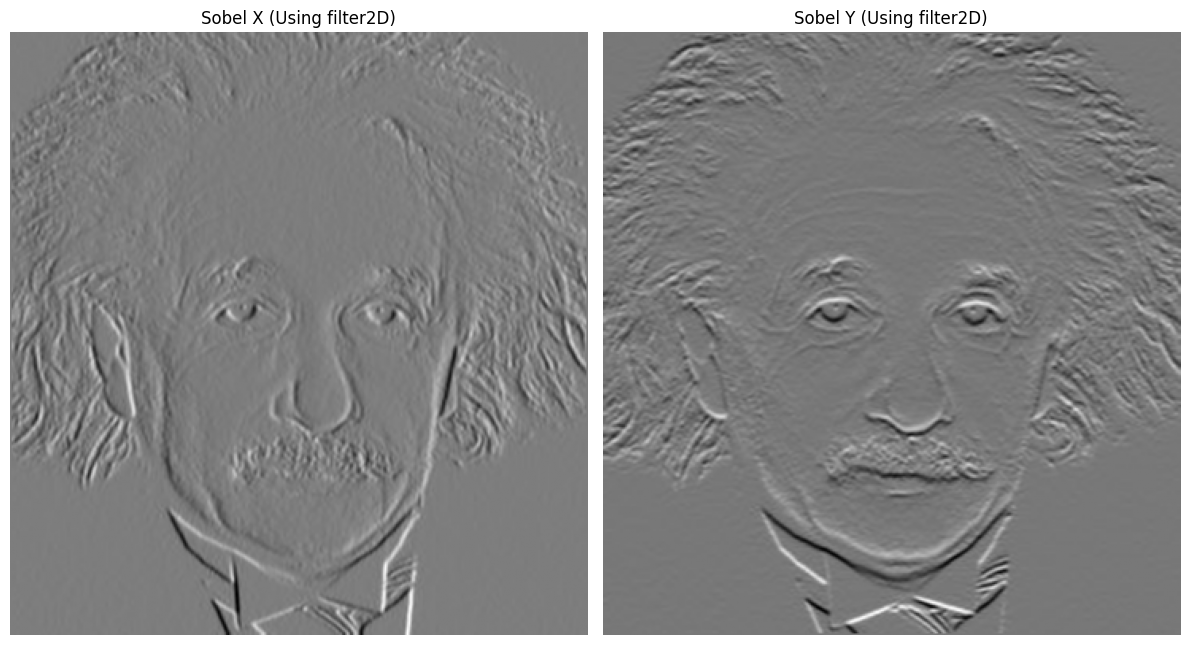

In [101]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using filter2D)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using filter2D)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [102]:
def apply_filter(image, filter):
    [rows, columns] = np.shape(image) # Get rows and columns of the image
    filtered_image = np.zeros(shape=(rows, columns)) # Create empty image
    
    for i in range(rows - 2):
        for j in range(columns - 2): # Process 2D convolution
            value = np.sum(np.multiply(filter, image[i:i + 3, j:j + 3])) 
            filtered_image[i + 1, j + 1] = value
    
    return filtered_image

In [103]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = apply_filter(einstein, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = apply_filter(einstein, sobel_y)

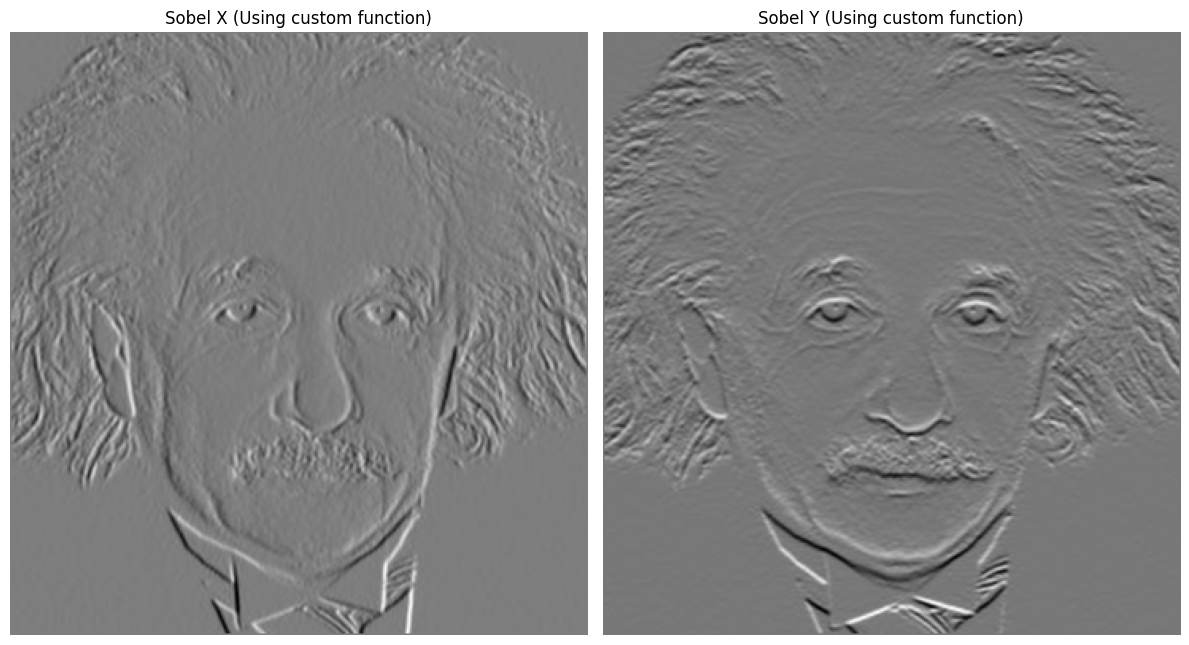

In [104]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using custom function)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using custom function)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [105]:
# Sobel x filter seperated
sobel_x_vertical = np.array([[1], [2], [1]])
sobel_x_horizontal = np.array([[1, 0, -1]])

# Sobel y filter seperated
sobel_y_vertical = np.array([[1], [0], [-1]])
sobel_y_horizontal = np.array([[1, 2, 1]])

# Apply the vertical and horizontal filters consecutively
x_mid = cv.filter2D(einstein, cv.CV_64F, sobel_x_horizontal)
x_filtered_image = cv.filter2D(x_mid, cv.CV_64F, sobel_x_vertical)

y_mid = cv.filter2D(einstein, cv.CV_64F, sobel_y_vertical)
y_filtered_image = cv.filter2D(y_mid, cv.CV_64F, sobel_y_horizontal)

print(sobel_x_vertical @ sobel_x_horizontal)
print(sobel_y_vertical @ sobel_y_horizontal)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


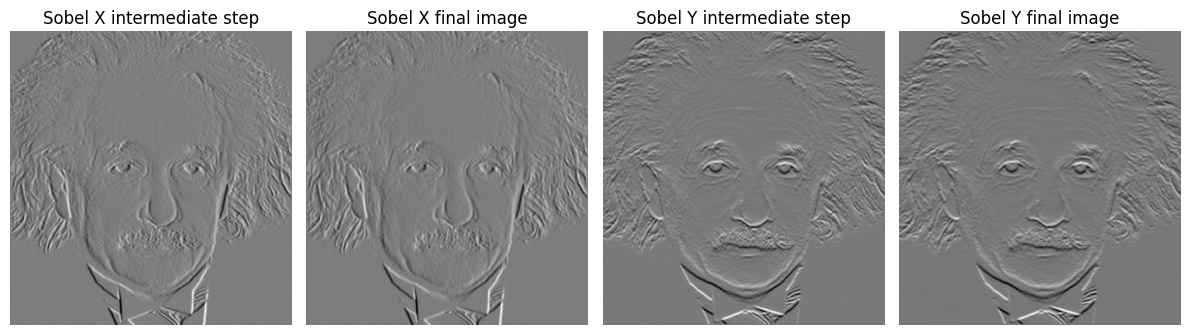

In [106]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 4, figsize=(12, 8))

ax[0].imshow(x_mid, cmap='gray')
ax[0].set_title('Sobel X intermediate step')
ax[0].axis("off")
ax[1].imshow(x_filtered_image, cmap='gray')
ax[1].set_title('Sobel X final image')
ax[1].axis("off")
ax[2].imshow(y_mid, cmap='gray')
ax[2].set_title('Sobel Y intermediate step')
ax[2].axis("off")
ax[3].imshow(y_filtered_image, cmap='gray')
ax[3].set_title('Sobel Y final image')
ax[3].axis("off")

plt.tight_layout()
plt.show()

## Question 8

In [107]:
def zoom(img, technique, scale=4):
    if technique == 'nn':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)
    elif technique == 'bilinear':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)

def norm_SSD(img1, img2):
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions")
    return np.sum((img1 - img2)**2) / img1.size

### For image 1

In [108]:
# Import images
im1 = cv.imread('a1images/a1q5images/im01.png')
assert im1 is not None
im1_small = cv.imread('a1images/a1q5images/im01small.png')
assert im1_small is not None

In [109]:
im1_zoomed_nn = zoom(im1_small, technique='nn')
im1_zoomed_bilinear = zoom(im1_small, technique='bilinear')

nn_SSD = norm_SSD(im1, im1_zoomed_nn)
bilinear_SSD = norm_SSD(im1, im1_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

Normalized SSD for Nearest Neighbour:  31.284316486625514
Normalized SSD for Bilinear:  31.053094618055557


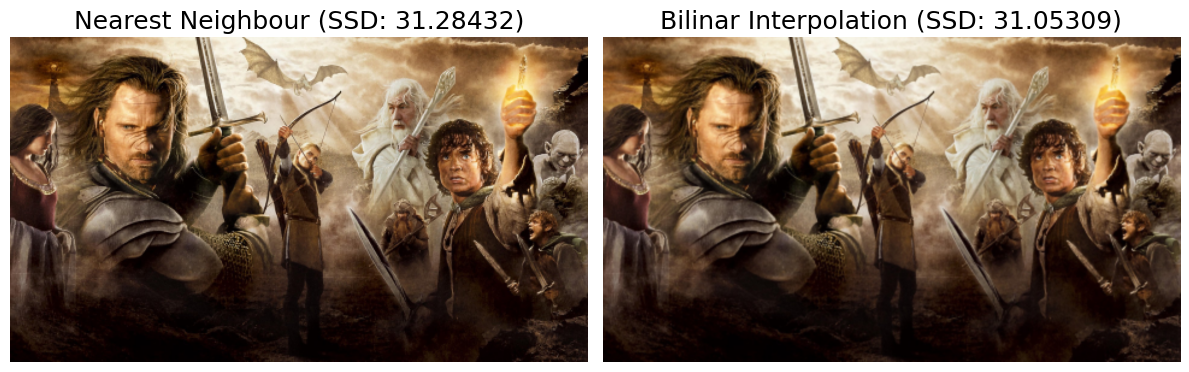

In [110]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the second image
axs[0].imshow(cv.cvtColor(im1_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=18)
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(cv.cvtColor(im1_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinar Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=18)
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

### For image 2

In [111]:
# Import images
im2 = cv.imread('a1images/a1q5images/im02.png')
assert im2 is not None
im2_small = cv.imread('a1images/a1q5images/im02small.png')
assert im2_small is not None

In [112]:
im2_zoomed_nn = zoom(im2_small, technique='nn')
im2_zoomed_bilinear = zoom(im2_small, technique='bilinear')

In [113]:
nn_SSD = norm_SSD(im2, im2_zoomed_nn)
bilinear_SSD = norm_SSD(im2, im2_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

Normalized SSD for Nearest Neighbour:  11.902013310185184
Normalized SSD for Bilinear:  10.682991753472223


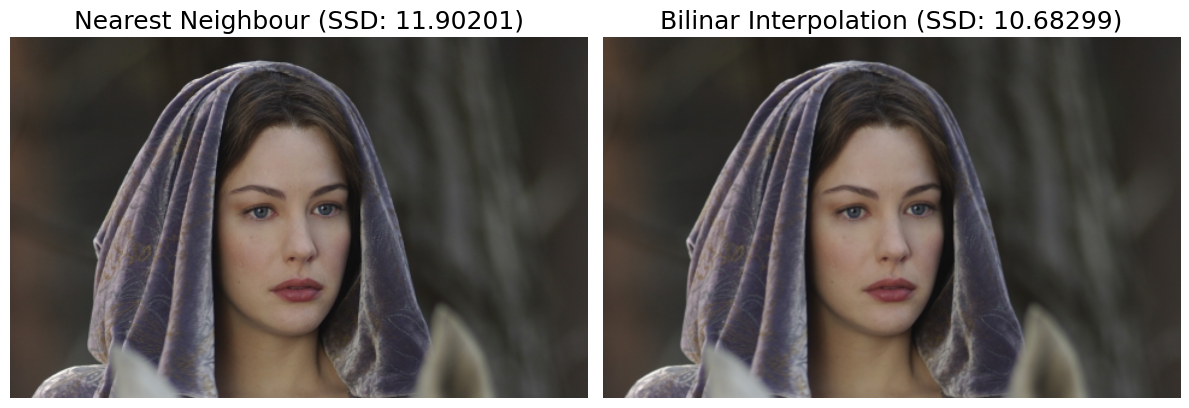

In [114]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
# Plot the second image
axs[0].imshow(cv.cvtColor(im2_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=18)
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(cv.cvtColor(im2_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinar Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=18)
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

### For image 3

In [115]:
# Import images
im3 = cv.imread('a1images/a1q5images/im03.png')
assert im3 is not None
im3_small = cv.imread('a1images/a1q5images/im03small.png')
assert im3_small is not None

In [116]:
# Zoom images
im3_zoomed_nn = zoom(im3_small, technique='nn')
im3_zoomed_bilinear = zoom(im3_small, technique='bilinear')

# Resize them to match the original image size
im3_zoomed_nn = cv.resize(im3_zoomed_nn, (im3.shape[1], im3.shape[0]), interpolation=cv.INTER_NEAREST)
im3_zoomed_bilinear = cv.resize(im3_zoomed_bilinear, (im3.shape[1], im3.shape[0]), interpolation=cv.INTER_LINEAR)

# Check shapes
print(im3_zoomed_nn.shape)
print(im3_zoomed_bilinear.shape)
print(im3.shape)

# Calculate normalized SSD
nn_SSD = norm_SSD(im3, im3_zoomed_nn)
bilinear_SSD = norm_SSD(im3, im3_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)


(1459, 2400, 3)
(1459, 2400, 3)
(1459, 2400, 3)
Normalized SSD for Nearest Neighbour:  17.171342909907853
Normalized SSD for Bilinear:  16.550198195110806


## Question 9

In [117]:
# Import images
daisy = cv.imread('a1images/daisy.jpg')
assert daisy is not None

In [118]:
mask = np.zeros(daisy.shape[:2],np.uint8)
 
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [119]:
rect = (50,100,550,490)
cv.grabCut(daisy,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

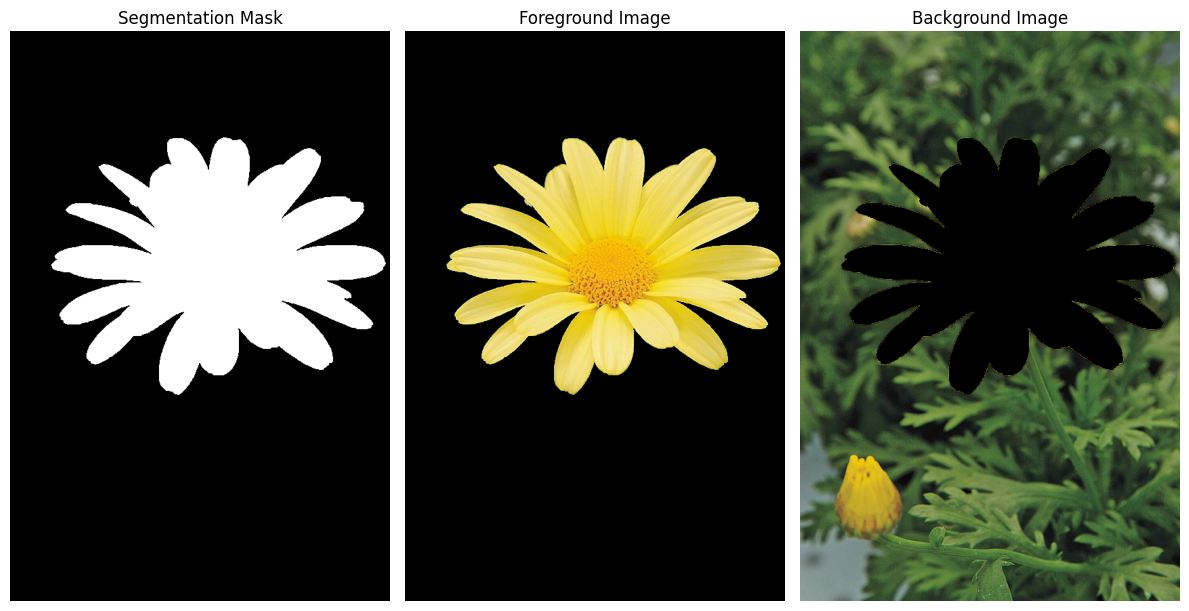

In [120]:
# Extract the foreground by multiplying the mask with the image
foreground = daisy * mask2[:, :, np.newaxis]

# Extract the background by subtracting the foreground from the original image
background = cv.subtract(daisy, foreground)

# Show the results
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(mask2, cmap='gray')
axs[0].set_title('Segmentation Mask')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
axs[1].set_title('Foreground Image')
axs[1].axis('off')

axs[2].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
axs[2].set_title('Background Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

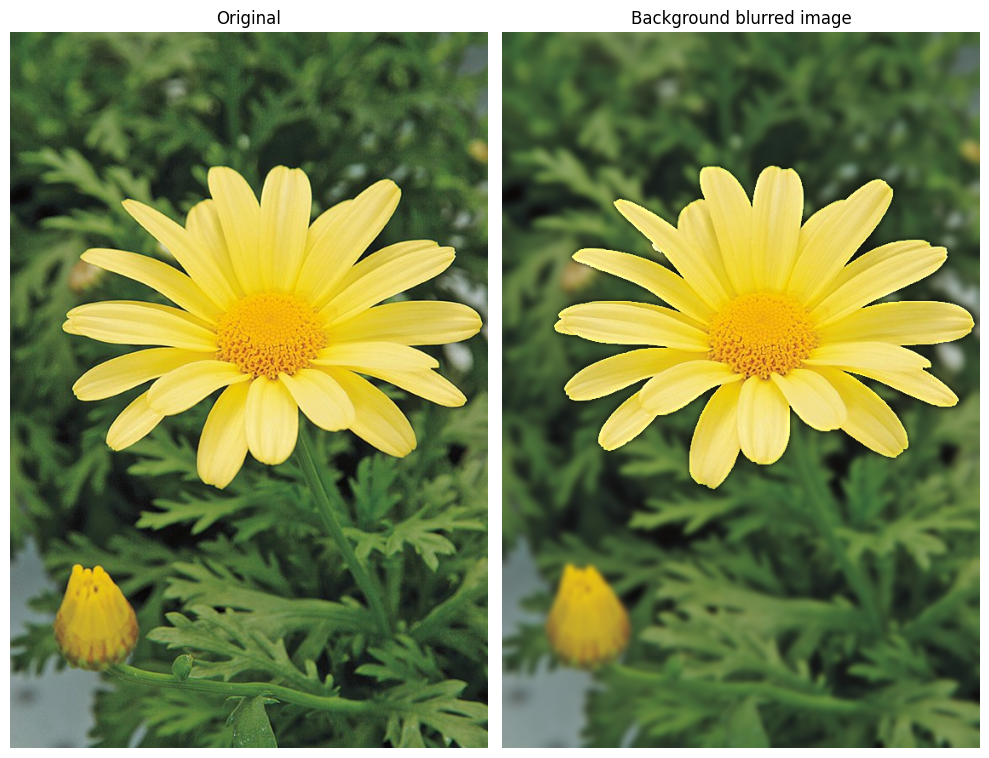

In [121]:
# Apply Gaussian blur to the background
blurred_background = cv.GaussianBlur(background, (25, 25), 3)

# Join image
blurred = cv.add(foreground, blurred_background)

# Show the results
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

axs[0].imshow(cv.cvtColor(daisy, cv.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
axs[1].set_title('Background blurred image')
axs[1].axis('off')

plt.tight_layout()
plt.show()